Physics Informed Neural Networks - June 2024

* Dr. Mohammad Samara

* Udemy

2D Burgers Equation - Mathematically modeling a heated aluminum rod

* Pre-processing notebook

Import python libraries to facilitate the work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd
#import tensorflow as tf

Rod description constants



In [2]:
nx = 51 # distance along the rod in the x direction
ny = 51 # distance along the rod in the y direction

nu = 0.1 # diffusion coefficient or kinematic viscosity

Time description constants

In [3]:
nt = 500 # number of time steps
dt = 0.001 # time step

Structure the domain

In [4]:
dx = 2 / (nx - 1) # domain is from 0 to 2 in the x direction
dy = 2 / (ny - 1) # domain is from 0 to 2 in the y direction
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

Show the domain

In [5]:
x

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ])

Create a grid

In [15]:
comb = np.zeros((ny, nx))

Show the grid

In [16]:
comb

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
comb.shape

(51, 51)

Explicity calculate each step

In [18]:
u = np.zeros((ny, nx)) # current time step
v = np.zeros((ny, nx))

un = np.zeros((ny, nx)) # previous time step
vn = np.zeros((ny, nx))

uf = np.zeros((nt, ny, nx)) # new time step
vf = np.zeros((nt, ny, nx))

Show the shapes

In [20]:
u.shape

(51, 51)

In [21]:
un.shape

(51, 51)

In [22]:
uf.shape

(500, 51, 51)

Initial conditions

In [23]:
u = np.ones((ny, nx)) # current time step
v = np.ones((ny, nx))

uf = np.ones((nt, ny, nx)) # new time step
vf = np.ones((nt, ny, nx))

u[int(0.75/dy):int(1.25/(dy + 1)), int(0.75/dy):int(1.25/(dy + 1))] = 5
v[int(0.75/dy):int(1.25/(dy + 1)), int(0.75/dy):int(1.25/(dy + 1))] = 5

uf[0, int(0.75/dy):int(1.25/(dy + 1)), int(0.75/dy):int(1.25/(dy + 1))] = 5
vf[0, int(0.75/dy):int(1.25/(dy + 1)), int(0.75/dy):int(1.25/(dy + 1))] = 5

Plot

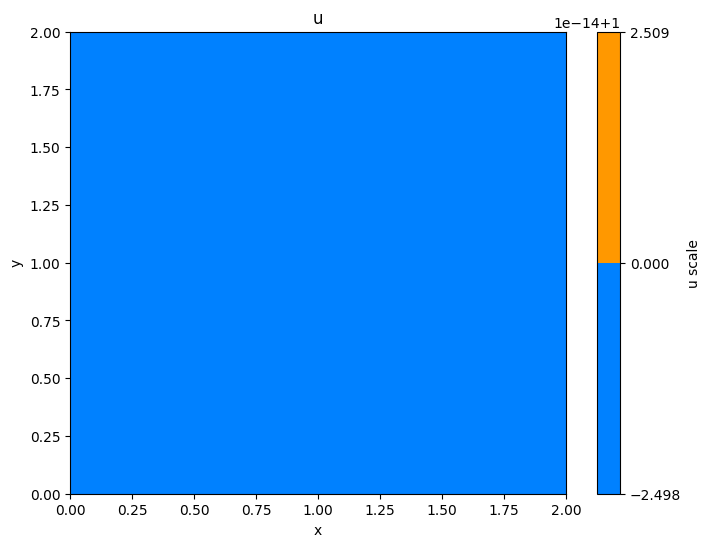

In [28]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")
plt.title('u')
plt.xlabel('x')
plt.ylabel('y')
plt.show()